## Статистика + Временные ряды. Задание 1

**Правила:**


* Выполненную работу нужно отправить телеграм-боту (адрес скоро отправим).
* Дедлайн **29.09.2021 в 12:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* За задание можно получить до **20 баллов**. $\text{Оценка} = min(20, \text{баллы за работу} + \text{бонус баллы})$.

### О задаче
В данном домашнем задании вы будете работать с данными о погоде. Архив с данными следует скачать по [ссылке](https://drive.google.com/file/d/1CbNxSosbrt_iyJCu1JMIiSySEeLr3T8L/view?usp=sharing). Датасет содержит данные погоды примерно за 5 лет для городов США, Канады и Израиля. Данные разбиты на несколько файлов:
* `city_attributes.csv` &mdash; для каждого города указана страна и его координаты;
* `humidity.csv` &mdash; относительная влажность;
* `preassure.csv` &mdash; давление;
* `temperature.csv` &mdash; температура в градусах Кельвина;
* `weather_description.csv` &mdash; текстовое описание погоды;
* `wind_direction.csv` &mdash; направление ветра в градусах;
* `wind_speed.csv` &mdash; скорость ветра м/с.

Сделаем вид, что вы самые настоящие метеорологи, и ваша задача &mdash; предсказать погоду на следующую неделю.

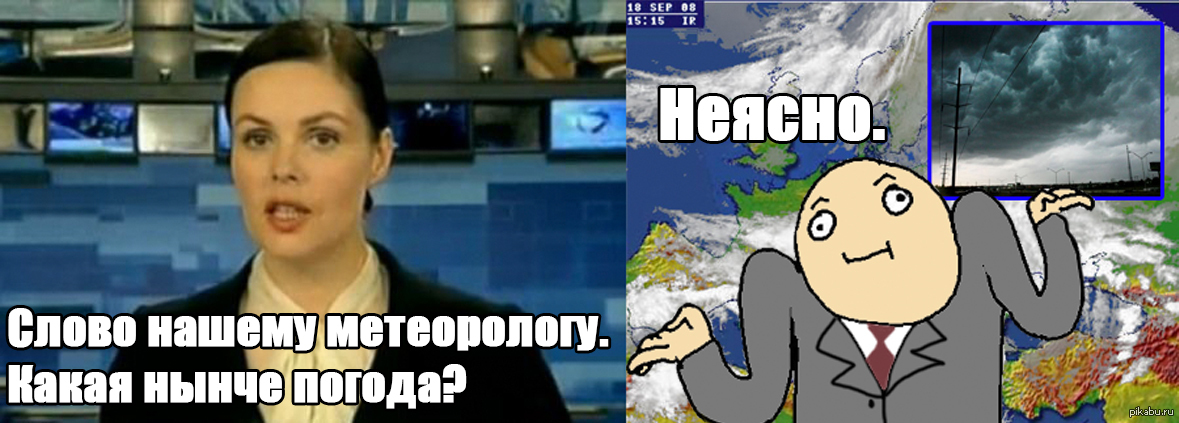


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
city_attributes = pd.read_csv("/content/drive/MyDrive/data/weather_ts/city_attributes.csv")
humidity = pd.read_csv("/content/drive/MyDrive/data/weather_ts/humidity.csv")
preassure = pd.read_csv("/content/drive/MyDrive/data/weather_ts/pressure.csv")
temperature = pd.read_csv("/content/drive/MyDrive/data/weather_ts/temperature.csv")
weather_description = pd.read_csv("/content/drive/MyDrive/data/weather_ts/weather_description.csv")
wind_direction = pd.read_csv("/content/drive/MyDrive/data/weather_ts/wind_direction.csv")
wind_speed = pd.read_csv("/content/drive/MyDrive/data/weather_ts/wind_speed.csv")

### Часть 2. Предсказания (15 баллов + 2 бонус балла)
Все предсказания будут будут строиться для города Z.

#### 2.1 Разбиение на трейн и тест.
Разбейте данные на трейн и тест. Для теста используйте последнюю неделю из данных.

In [ ]:
df = pd.DataFrame()
df["datetime"] = temperature["datetime"]
df["temperature"] = temperature["Houston"]
df["preassure"] = preassure["Houston"]
df["humidity"] = humidity["Houston"]
df["weather_description"] = weather_description["Houston"]
df["wind_direction"] = wind_direction["Houston"]
df["wind_speed"] = wind_speed["Houston"]

In [ ]:
df = df.dropna()

In [ ]:
df.datetime = pd.to_datetime(df.datetime)

In [ ]:
df = df.set_index('datetime')

In [ ]:
df["dayofweek"] = df.index.dayofweek
df["quarter"] = df.index.quarter
df["month"] = df.index.month
df["year"] = df.index.year
df["dayofyear"] = df.index.dayofyear
df["dayofmonth"] = df.index.day
df["weekofyear"] = df.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


2.1 Разобьем данные на трейн и тест

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
humidity.fillna(method="ffill", inplace=True)
preassure.fillna(method="ffill", inplace=True)
temperature.fillna(method="ffill", inplace=True)
weather_description.fillna(method="ffill", inplace=True)
wind_direction.fillna(method="ffill", inplace=True)
wind_speed.fillna(method="ffill", inplace=True)

In [ ]:
humidity.dropna(inplace=True)
preassure.dropna(inplace=True)
temperature.dropna(inplace=True)
weather_description.dropna(inplace=True)
wind_direction.dropna(inplace=True)
wind_speed.dropna(inplace=True)

In [ ]:
df_dumm = pd.get_dummies(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_dumm.drop("temperature", axis=1), 
                                                    df_dumm["temperature"],
                                                    test_size=168, 
                                                    shuffle=False)

#### 2.3. Предсказание с помощью нейросетей 
Используйте GPU для обучения модели. Если нет своей машины, то используйте [colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true). Если так будет удобнее, то эту часть работы можете сделать в отдельной тетрадке.

1. Постройте нейросетевую модель для предсказния всех числовых показателей погоды на неделю вперед. Если построите модель, которая также справляется предсказанием описания погоды (задача классификации), то **+2 бонусных балла**.

2. Попробуйте улучшить модель. По-хорошему, здесь тоже нужна кросс-валидация для сравнения. Но так как построение модели требует немало времени, то можно поступить иначе. Из тренировочной части данных выберите валидационную. Выбирайте модель по качеству на валидации. В качестве метрики используйте усредненный MAPE для числовых признаков. Если еще решаете задачу классификации, то метрику подберите сами. 

3. Выберите лучшую модель. Посчитайте качество на тесте. Визуализируйте результат лучшей модели. 

4. Сделайте выводы.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
humidity.fillna(method="ffill", inplace=True)
preassure.fillna(method="ffill", inplace=True)
temperature.fillna(method="ffill", inplace=True)
# weather_description.fillna(method="ffill", inplace=True)
wind_direction.fillna(method="ffill", inplace=True)
wind_speed.fillna(method="ffill", inplace=True)

In [ ]:
df = pd.DataFrame()
df["datetime"] = temperature["datetime"]
df["temperature"] = temperature["Houston"]
df["preassure"] = preassure["Houston"]
df["humidity"] = humidity["Houston"]
# df["weather_description"] = weather_description["Houston"]
df["wind_direction"] = wind_direction["Houston"]
df["wind_speed"] = wind_speed["Houston"]

In [ ]:
df.datetime = pd.to_datetime(df.datetime)
df = df.set_index('datetime')

In [ ]:
df = df.dropna()

1. Построим нейросетевую модель для предсказния всех числовых показателей погоды на неделю вперед

In [ ]:
df_train = df[["temperature", "preassure", "humidity", "wind_direction", "wind_speed"]][:-168]
df_test = df[["temperature", "preassure", "humidity", "wind_direction", "wind_speed"]][-168:]

In [ ]:
num_cols = ["temperature", "preassure", "humidity", "wind_direction", "wind_speed"]

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_train = df_train.to_numpy()
df_test = df_test.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [ ]:
import time
from tqdm.notebook import tqdm
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, RandomSampler, SequentialSampler

from IPython.display import clear_output
%matplotlib inline

sns.set(font_scale=1.3, palette='Set2')

In [ ]:
class TSDataset(Dataset):
    def __init__(self, data, n_past):
        self.data = data
        self.n_past = n_past  # tau -- длина отрезка временого ряда

    def __len__(self):
        return self.data.shape[0] - self.n_past

    def __getitem__(self, index):
        return self.data[index: self.n_past + index], self.data[self.n_past + index]

Модель будет смотреть в прошлое на $\tau$ измерений. В данных одному дню соответствует $24$ измерений, поэтому возьмем $tau=24$.

In [ ]:
n_past = 24  # tau -- длина отрезка временого ряда
batch_size = 16  # размер батча

train_dataset = TSDataset(df_train, n_past)
train_batch_gen = DataLoader(train_dataset, batch_size, shuffle=False)

In [ ]:
def plot_learning_curves(history):
    '''
    Функция для обучения модели и вывода лосса и метрики во время обучения.

    :param history: (dict)
        accuracy и loss на обучении и валидации.
    '''
    
    fig = plt.figure(figsize=(10, 5))
    plt.plot(history['loss'])
    plt.ylabel('Лосс')
    plt.xlabel('Эпоха')
    plt.show()
    
    
def evaluate_ts_model(model, start_seq, test_data):
    '''
    Функция для проверки качества модели на обучающем отрезке ряда.

    :param model: обучаемая модель,
    :param start_seq: обучающие данные для первого предсказания,
    :param test_data: тестовые данные.
    
    :return: результаты предсказания.
    '''
    result = []
    
    input_tensor = torch.FloatTensor(start_seq).to(device).unsqueeze(0)
    with torch.no_grad():
        for i in range(len(test_data)):
            logits = model(input_tensor[:, i:, :]).unsqueeze(0)
            input_tensor = torch.cat((input_tensor, logits), 1)
            result.append(logits.cpu().numpy().squeeze())
    return result


def plot_ts_results(result, show_from=0, lw=2):
    '''
    Визуализирует результаты прогнозирования

    :param result: прогнозы
    :param show_from: с какого момента визуализировать обучающие данные
    :param lw: толщина линии
    '''
    fontsize = 16
    plt.figure(figsize = (18, 8))
    plt.title('Зависимость потребления электричества от времени')
    plt.plot(df.index[show_from:], df.Consumption[show_from:], label='Истина', lw=lw)

    plt.plot(df.index[-168:], result[:, 0], label='Предсказание', lw=lw)

    plt.xlabel('Время')
    plt.ylabel('Потребление электричества')
    plt.legend()
    plt.show()
    
    
def train_ts_model(
    model, 
    criterion,
    optimizer, 
    train_batch_gen,
    num_epochs=50,
):
    '''
    Функция для обучения модели и вывода лосса во время обучения.

    :param model: обучаемая модель
    :param criterion: функция потерь
    :param optimizer: метод оптимизации
    :param train_batch_gen: генератор батчей для обучения
    :param num_epochs: количество эпох

    :return: обученная модель
    :return: (dict) loss на обучении ('история' обучения)
    '''

    history = defaultdict(list)

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0
        
        start_time = time.time()

        # Устанавливаем поведение dropout / batch_norm  в обучение
        model.train(True) 

        # На каждой 'эпохе' делаем полный проход по данным
        for X_batch, y_batch in train_batch_gen:
            X_batch = X_batch.type('torch.FloatTensor').to(device)
            y_batch = y_batch.type('torch.FloatTensor').to(device)
            
            logits = model(X_batch)
            
            loss = criterion(logits, y_batch)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss += np.sum(loss.detach().cpu().numpy())
        print(train_loss)
        # Подсчитываем лосс и сохраням в 'историю'
        train_loss /= len(train_batch_gen)
        history['loss'].append(train_loss)
        
        clear_output()

        # Печатаем результаты после каждой эпохи
        print('Эпоха {} из {} выполнена за {:.3f} сек.'.format(
            epoch + 1, num_epochs, time.time() - start_time))
        print('  лосс: \t{:.6f}'.format(train_loss))
        plot_learning_curves(history)
        
    return model, history

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=100):
        super().__init__()
        
        self.hidden_size = hidden_size
        
        # input_seq.shape = [16, 24, 4]
        # lstm_out.shape = [16, 24, 100]
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
  
        # hidden_state = [4, 16, 100]
        self.linear = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, input_seq):
        lstm_out, (hidden_state, _) = self.lstm(input_seq)
        predictions = self.linear(hidden_state.squeeze(0))
        return predictions

In [ ]:
device = torch.device("cpu")

In [ ]:
lstm_model = LSTM(input_size=5, output_size=5)
lstm_model.to("cpu")

LSTM(
  (lstm): LSTM(5, 100, batch_first=True)
  (linear): Linear(in_features=100, out_features=5, bias=True)
)

In [ ]:
import time
from tqdm.notebook import tqdm
from collections import defaultdict

Эпоха 25 из 25 выполнена за 27.218 сек.
  лосс: 	0.025063


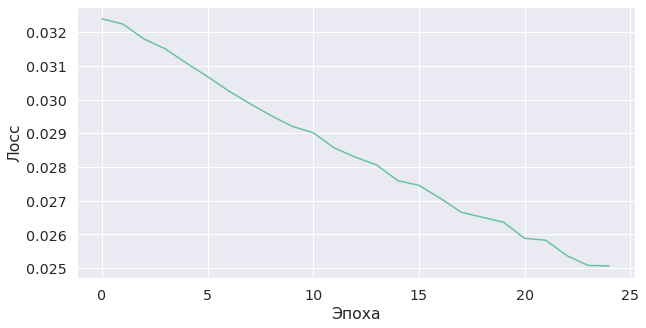

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

lstm_model, _ = train_ts_model(lstm_model, criterion, optimizer, train_batch_gen, num_epochs=25);

In [ ]:
start_seq = df_train[-n_past:]
lstm_result = evaluate_ts_model(lstm_model, start_seq, df_test)

In [ ]:
  lstm_result = np.array(lstm_result, ndmin=2)
lstm_result = scaler.inverse_transform(lstm_result)

In [ ]:
lstm_result

array([[ 286.9446   , 1024.0063   ,   49.25824  ,  325.61636  ,
           5.677245 ],
       [ 285.3316   , 1024.0691   ,   49.798573 ,  332.87778  ,
           5.518694 ],
       [ 284.27753  , 1024.6404   ,   50.12126  ,  319.4364   ,
           5.2578554],
       [ 283.31436  , 1025.6995   ,   49.980698 ,  312.2864   ,
           5.1502194],
       [ 282.68777  , 1026.4937   ,   50.69597  ,  307.97443  ,
           5.1431   ],
       [ 281.97015  , 1026.7009   ,   52.710094 ,  311.33548  ,
           5.130507 ],
       [ 281.0017   , 1026.6057   ,   55.10485  ,  315.96573  ,
           5.0559464],
       [ 279.68417  , 1026.744    ,   56.718018 ,  323.1876   ,
           4.9617753],
       [ 277.96902  , 1026.7839   ,   57.637447 ,  335.24527  ,
           4.853266 ],
       [ 276.15277  , 1026.4512   ,   57.287495 ,  344.81216  ,
           4.7449217],
       [ 274.73123  , 1026.234    ,   55.71463  ,  355.98843  ,
           4.632465 ],
       [ 274.47357  , 1026.6499   ,   52.83

In [ ]:
df_train = df[:-168]
df_test = df[-168:]

In [ ]:
def MAPELoss(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/(Y_actual + 0.001)))*100
  print(mape)
  return mape.mean()

def MAELoss(Y_actual,Y_Predicted):
  mae = np.mean(np.abs((Y_actual - Y_Predicted)))
  print(mae)
  return mae.mean()

In [ ]:
y_truth = df_test.to_numpy()
mape = MAPELoss(df_test, lstm_result)
print('MAPE на тестовых данных = {:.3f}'.format(mape))

temperature            2.073537
preassure              0.670153
humidity              36.264567
wind_direction    801964.545134
wind_speed         10865.502136
dtype: float64
MAPE на тестовых данных = 162573.811


 В качестве метрики лучше использовать MAE, так как признаки wind_direction и wind_speed близки к нулю, в результате MAPE - неустойчива

In [ ]:
y_truth = df_test.to_numpy()
mae = MAELoss(df_test, lstm_result)
print('MAE на тестовых данных = {:.3f}'.format(mae))

temperature        5.994617
preassure          6.826174
humidity          20.210797
wind_direction    67.056026
wind_speed         1.646312
dtype: float64
MAE на тестовых данных = 20.347


В нашем случае нейронная сеть предсказывает погоду хуже чем классический ML. Вероятней всего это связано с недостатком данных (недообучение)